**DTW 통한 코드 진행 유사도 분석**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#동일한 시간성의 데이터뿐 아니라 주변 요소까지 비교쌍으로 사용하여 정확도를 높인다. ( 주변 시점의 데이터를 활용하여 비교한뒤 더 비슷한 요소와 매칭)
#서로 길이가 다른 시계열 데이터에도 사용 가능

# 포자랩스 Commu Data 불러오기

In [6]:
import numpy as np

In [7]:
import pandas as pd

meta = pd.read_csv("/content/drive/MyDrive/Data/commu_meta.ver_7.csv")


In [8]:
meta

,Unnamed: 0,audio_key,chord_progressions,chord_list,pitch_range,num_measures,bpm,bpm_group,genre,track_role,inst,sample_rhythm,time_signature,min_velocity,max_velocity,split_data,id
0,0,aminor,"['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am...","['soc', 'Am', 'C', 'G', 'Dm', 'Am', 'C', 'G', ...",mid,8,120,fast,cinematic,main_melody,string_ensemble,standard,4/4,101,102,train,commu00001
1,1,cmajor,"['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'Dm',...","['soc', 'C', 'Dm', 'G7', 'C', 'Am', 'F', 'G', ...",mid_low,8,80,slow,newage,accompaniment,acoustic_piano,standard,4/4,23,30,train,commu00002
2,2,aminor,"['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am...","['soc', 'Am', 'F', 'E+', 'E', 'eoc']",mid_high,8,150,very_fast,cinematic,riff,string_violin,standard,4/4,123,127,train,commu00003
3,3,cmajor,"['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'Gm',...","['soc', 'C', 'Gm', 'C', 'Gm', 'Dm', 'A#', 'F',...",mid,8,110,fast,cinematic,pad,choir,standard,4/4,45,46,train,commu00004
4,4,aminor,"['Am', 'Am', 'Am', 'Am', 'Em', 'Em', 'Em', 'Em...","['soc', 'Am', 'Em', 'F', 'Am', 'Em', 'F', 'eoc']",mid_low,4,60,very_slow,cinematic,pad,acoustic_piano,standard,4/4,21,22,train,commu00005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11139,11139,cmajor,"['Fmaj7', 'Fmaj7', 'Fmaj7', 'Fmaj7', 'Fmaj7', ...","['soc', 'Fmaj7', 'Em7', 'Fmaj7', 'G7', 'C', 'F...",mid_high,8,110,fast,cinematic,pad,synth_pad,standard,4/4,83,84,val,commu11140
11140,11140,cmajor,"['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am...","['soc', 'Am', 'Fmaj7', 'Cmaj7', 'G', 'eoc']",mid_low,8,110,fast,cinematic,riff,acoustic_guitar,standard,4/4,51,55,val,commu11141
11141,11141,aminor,"['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am...","['soc', 'Am', 'F', 'Am7', 'F', 'eoc']",very_low,8,145,very_fast,cinematic,bass,string_ensemble,standard,4/4,109,112,val,commu11142
11142,11142,aminor,"['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am...","['soc', 'Am', 'Am7', 'Am', 'Am7', 'eoc']",low,8,140,very_fast,cinematic,accompaniment,string_cello,standard,4/4,55,115,val,commu11143


In [9]:
chord_prog = meta["chord_progressions"]

# 전체 chord_progressions 리스트 형태로 변화 시키기

In [10]:
# df_commu_prog: str -> list
for i in range(chord_prog.shape[0]):
    # 특수문자([, ], ', ,)를 제거한 하나의 string으로 변환
    chord_prog[i] = chord_prog[i].replace("'", "").replace(",", "").replace("[", "").replace("]", "")
    # 위에서 만든 string 속 각 코드들을 원소로 가지는 리스트로 변환
    chord_prog[i] = chord_prog[i].split(" ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
meta.head()

,Unnamed: 0,audio_key,chord_progressions,chord_list,pitch_range,num_measures,bpm,bpm_group,genre,track_role,inst,sample_rhythm,time_signature,min_velocity,max_velocity,split_data,id
0,0,aminor,"[Am, Am, Am, Am, Am, Am, Am, Am, C, C, C, C, C...","['soc', 'Am', 'C', 'G', 'Dm', 'Am', 'C', 'G', ...",mid,8,120,fast,cinematic,main_melody,string_ensemble,standard,4/4,101,102,train,commu00001
1,1,cmajor,"[C, C, C, C, C, C, C, C, Dm, Dm, Dm, Dm, Dm, D...","['soc', 'C', 'Dm', 'G7', 'C', 'Am', 'F', 'G', ...",mid_low,8,80,slow,newage,accompaniment,acoustic_piano,standard,4/4,23,30,train,commu00002
2,2,aminor,"[Am, Am, Am, Am, Am, Am, Am, Am, Am, Am, Am, A...","['soc', 'Am', 'F', 'E+', 'E', 'eoc']",mid_high,8,150,very_fast,cinematic,riff,string_violin,standard,4/4,123,127,train,commu00003
3,3,cmajor,"[C, C, C, C, C, C, C, C, Gm, Gm, Gm, Gm, Gm, G...","['soc', 'C', 'Gm', 'C', 'Gm', 'Dm', 'A#', 'F',...",mid,8,110,fast,cinematic,pad,choir,standard,4/4,45,46,train,commu00004
4,4,aminor,"[Am, Am, Am, Am, Em, Em, Em, Em, F, F, F, F, F...","['soc', 'Am', 'Em', 'F', 'Am', 'Em', 'F', 'eoc']",mid_low,4,60,very_slow,cinematic,pad,acoustic_piano,standard,4/4,21,22,train,commu00005


# 공통 비교 샘플 가져오기

* 동일한 조건에서 뽑은 샘플들 (cmajor - 4/4 - slow - 8)


* 동일한 조건을 가진 샘플들 중에 index:53, 457, 739, 1750, 2464, 2811, 4742, 7980, 9936 들을 index:1 이랑 비교 하기 위함임





In [12]:
meta1 = meta.loc[[1,40,41,42,45,53,55,57,86,117,131,164,175,189,193,256,284,287,291,457,705,725,737,739,751,798,1040,1481,1487,1750,2464,2562,2811,2855,2919,3401,4742,4757,4890,7275,7956,7957,7972,7974,7980,7994,8140,8179,8684,9179,9291,9381,9400,9465,9936], : ]

In [13]:
meta1

,Unnamed: 0,audio_key,chord_progressions,chord_list,pitch_range,num_measures,bpm,bpm_group,genre,track_role,inst,sample_rhythm,time_signature,min_velocity,max_velocity,split_data,id
1,1,cmajor,"[C, C, C, C, C, C, C, C, Dm, Dm, Dm, Dm, Dm, D...","['soc', 'C', 'Dm', 'G7', 'C', 'Am', 'F', 'G', ...",mid_low,8,80,slow,newage,accompaniment,acoustic_piano,standard,4/4,23,30,train,commu00002
40,40,cmajor,"[C, C, C, C, C, C, C, C, F, F, F, F, G, G, G, ...","['soc', 'C', 'F', 'G', 'C', 'F', 'Em', 'C', 'F...",mid_high,8,80,slow,newage,main_melody,acoustic_piano,standard,4/4,21,22,train,commu00041
41,41,cmajor,"[Dm7, Dm7, Dm7, Dm7, Gsus4, Gsus4, Gsus4, Gsus...","['soc', 'Dm7', 'Gsus4', 'Cmaj7', 'A7', 'Dm7', ...",mid_high,8,65,slow,newage,main_melody,acoustic_piano,standard,4/4,33,40,train,commu00042
42,42,cmajor,"[C, C, C, C, C, C, C, C, F, F, F, F, F, F, F, ...","['soc', 'C', 'F', 'Am', 'G', 'C', 'F', 'Am', '...",mid,8,75,slow,cinematic,main_melody,string_cello,standard,4/4,73,74,train,commu00043
45,45,cmajor,"[C, C, C, C, C, C, C, C, Am, Am, Am, Am, Am, A...","['soc', 'C', 'Am', 'F', 'G', 'F', 'C', 'Am', '...",mid_low,8,80,slow,newage,accompaniment,acoustic_piano,standard,4/4,23,30,train,commu00046
53,53,cmajor,"[F, F, F, F, F, F, F, F, C, C, C, C, C, C, C, ...","['soc', 'F', 'C', 'G', 'Am', 'F', 'C', 'G', 'A...",mid,8,80,slow,newage,accompaniment,acoustic_piano,standard,4/4,23,24,train,commu00054
55,55,cmajor,"[C, C, C, C, C, C, C, C, F, F, F, F, F, F, F, ...","['soc', 'C', 'F', 'C', 'F', 'Am', 'G', 'F', 'G...",mid_high,8,80,slow,newage,main_melody,acoustic_piano,standard,4/4,21,30,train,commu00056
57,57,cmajor,"[Cmaj7, Cmaj7, Cmaj7, Cmaj7, Cmaj7, Cmaj7, Cma...","['soc', 'Cmaj7', 'Am7', 'Fmaj7', 'G', 'Cmaj7',...",mid_low,8,80,slow,newage,accompaniment,acoustic_piano,standard,4/4,21,30,train,commu00058
86,86,cmajor,"[F, F, F, F, G, G, G, G, Am, Am, Am, Am, C, C,...","['soc', 'F', 'G', 'Am', 'C', 'F', 'G', 'Am', '...",mid,8,80,slow,newage,accompaniment,acoustic_piano,standard,4/4,23,24,train,commu00087
117,117,cmajor,"[C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, ...","['soc', 'C', 'G', 'F', 'G', 'eoc']",mid_high,8,80,slow,newage,main_melody,acoustic_piano,standard,4/4,21,30,train,commu00118


# chord_progression을 DTW에 적용 시키기 위해 시계열 형태로 바꿔주는 과정


* 각각의 chord들을 4자리수로 indexing 한다



In [14]:
data = pd.read_excel("/content/drive/MyDrive/Data/piano_chord_revised.xlsx",index_col = 0)
data.head(3)

,chord,major_chord,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,index1,index2,index3,index
major,,,,,,,,,,,,,,,,,,
Cb,,Cb,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1101
Cb,m,Cbm,0,0,1,0,0,0,1,0,0,0,0,1,1,1,2,1102
Cb,7,Cb7,0,0,0,1,0,0,1,0,0,1,0,1,1,1,3,1103


In [15]:
indexes = data[['major_chord','index']]
indexes.head()

,major_chord,index
major,,
Cb,Cb,1101
Cb,Cbm,1102
Cb,Cb7,1103
Cb,Cbm7,1104
Cb,Cbmaj7,1105


In [16]:
chord_index = indexes.set_index('major_chord')['index'].to_dict()
chord_index

{'Cb ': 1101,
 'Cbm': 1102,
 'Cb7': 1103,
 'Cbm7': 1104,
 'Cbmaj7': 1105,
 'CbmM7': 1106,
 'Cb6': 1107,
 'Cbm6': 1108,
 'Cbadd2': 1109,
 'Cbmadd2': 1110,
 'Cbsus4': 1111,
 'Cbsus2': 1112,
 'Cbdim': 1113,
 'Cbdim7': 1114,
 'Cbm7b5': 1115,
 'Cb+': 1116,
 'Cb7sus4': 1117,
 'C ': 1001,
 'Cm': 1002,
 'C7': 1003,
 'Cm7': 1004,
 'Cmaj7': 1005,
 'CmM7': 1006,
 'C6': 1007,
 'Cm6': 1008,
 'Cadd2': 1009,
 'Cmadd2': 1010,
 'Csus4': 1011,
 'Csus2': 1012,
 'Cdim': 1013,
 'Cdim7': 1014,
 'Cm7b5': 1015,
 'C+': 1016,
 'C7sus4': 1017,
 'C# ': 1201,
 'C#m': 1202,
 'C#7': 1203,
 'C#m7': 1204,
 'C#maj7': 1205,
 'C#mM7': 1206,
 'C#6': 1207,
 'C#m6': 1208,
 'C#add2': 1209,
 'C#madd2': 1210,
 'C#sus4': 1211,
 'C#sus2': 1212,
 'C#dim': 1213,
 'C#dim7': 1214,
 'C#m7b5': 1215,
 'C#+': 1216,
 'C#7sus4': 1217,
 'Db ': 2101,
 'Dbm': 2102,
 'Db7': 2103,
 'Dbm7': 2104,
 'Dbmaj7': 2105,
 'DbmM7': 2106,
 'Db6': 2107,
 'Dbm6': 2108,
 'Dbadd2': 2109,
 'Dbmadd2': 2110,
 'Dbsus4': 2111,
 'Dbsus2': 2112,
 'Dbdim': 2113,
 'D

In [17]:
meta1 = meta.loc[[1,40,41,42,45,53,55,57,86,117,131,164,175,189,193,256,284,287,291,457,705,725,737,739,751,798,1040,1481,1487,1750,2464,2562,2811,2855,2919,3401,4742,4757,4890,7275,7956,7957,7972,7974,7980,7994,8140,8179,8684,9179,9291,9381,9400,9465,9936], : ]

In [18]:
s1 = meta1.loc[1, "chord_progressions"]
s2 = meta1.loc[53, "chord_progressions"]
s3 = meta1.loc[457, "chord_progressions"]
s4 = meta1.loc[739, "chord_progressions"]
s5 = meta1.loc[1750, "chord_progressions"]
s6 = meta1.loc[2464, "chord_progressions"]
s7 = meta1.loc[2811, "chord_progressions"]
s8 = meta1.loc[4742, "chord_progressions"]
s9 = meta1.loc[7980, "chord_progressions"]
s10 = meta1.loc[9936, "chord_progressions"]

In [19]:
print("s1:", s1)
print("s2:", s2)
print("s3:", s3)
print("s4:", s4)
print("s5:", s5)
print("s6:", s6)
print("s7:", s7)
print("s8:", s8)
print("s9:", s9)
print("s10:", s10)

s1: ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'Dm', 'Dm', 'Dm', 'Dm', 'Dm', 'Dm', 'Dm', 'Dm', 'G7', 'G7', 'G7', 'G7', 'G7', 'G7', 'G7', 'G7', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
s2: ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am']
s3: ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'Em', 'Em', 'Em', 'Em', 'Em', 'Em', 'Em', 'Em', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'C', 'C', 'C', 'C', 'G', 'G', 'G', 'G', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'Em', 'Em', 'Em', 'Em', 'Em', 'Em', 'Em', 'Em', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'G', 'G',

In [20]:
# chord_index의 key에 띄어쓰기가 많아서 dictionary 다시 만들었다
new_chord_index = {}
for k, v in chord_index.items():
  k = k.strip()
  new_chord_index[k] = v

In [21]:
new_chord_index

{'Cb': 1101,
 'Cbm': 1102,
 'Cb7': 1103,
 'Cbm7': 1104,
 'Cbmaj7': 1105,
 'CbmM7': 1106,
 'Cb6': 1107,
 'Cbm6': 1108,
 'Cbadd2': 1109,
 'Cbmadd2': 1110,
 'Cbsus4': 1111,
 'Cbsus2': 1112,
 'Cbdim': 1113,
 'Cbdim7': 1114,
 'Cbm7b5': 1115,
 'Cb+': 1116,
 'Cb7sus4': 1117,
 'C': 1001,
 'Cm': 1002,
 'C7': 1003,
 'Cm7': 1004,
 'Cmaj7': 1005,
 'CmM7': 1006,
 'C6': 1007,
 'Cm6': 1008,
 'Cadd2': 1009,
 'Cmadd2': 1010,
 'Csus4': 1011,
 'Csus2': 1012,
 'Cdim': 1013,
 'Cdim7': 1014,
 'Cm7b5': 1015,
 'C+': 1016,
 'C7sus4': 1017,
 'C#': 1201,
 'C#m': 1202,
 'C#7': 1203,
 'C#m7': 1204,
 'C#maj7': 1205,
 'C#mM7': 1206,
 'C#6': 1207,
 'C#m6': 1208,
 'C#add2': 1209,
 'C#madd2': 1210,
 'C#sus4': 1211,
 'C#sus2': 1212,
 'C#dim': 1213,
 'C#dim7': 1214,
 'C#m7b5': 1215,
 'C#+': 1216,
 'C#7sus4': 1217,
 'Db': 2101,
 'Dbm': 2102,
 'Db7': 2103,
 'Dbm7': 2104,
 'Dbmaj7': 2105,
 'DbmM7': 2106,
 'Db6': 2107,
 'Dbm6': 2108,
 'Dbadd2': 2109,
 'Dbmadd2': 2110,
 'Dbsus4': 2111,
 'Dbsus2': 2112,
 'Dbdim': 2113,
 'Dbdim

In [22]:
def get_index(code_lst):
  index_lst = []
  for code in code_lst:
    index_lst.append(new_chord_index[code])
  return index_lst

In [23]:
new_chord_index['Am']

6002

In [24]:
s1n = get_index(s1)
s2n = get_index(s2)
s3n = get_index(s3)
s4n = get_index(s4)
s5n = get_index(s5)
s6n = get_index(s6)
s7n = get_index(s7)
s8n = get_index(s8)
s9n = get_index(s9)
s10n = get_index(s10)

In [25]:
print("s1:", s1n)
print("s2:", s2n)
print("s3:", s3n)
print("s4:", s4n)
print("s5:", s5n)
print("s6:", s6n)
print("s7:", s7n)
print("s8:", s8n)
print("s9:", s9n)
print("s10:", s10n)

s1: [1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 5003, 5003, 5003, 5003, 5003, 5003, 5003, 5003, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 6002, 6002, 6002, 6002, 6002, 6002, 6002, 6002, 4001, 4001, 4001, 4001, 4001, 4001, 4001, 4001, 5001, 5001, 5001, 5001, 5001, 5001, 5001, 5001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001]
s2: [4001, 4001, 4001, 4001, 4001, 4001, 4001, 4001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 5001, 5001, 5001, 5001, 5001, 5001, 5001, 5001, 6002, 6002, 6002, 6002, 6002, 6002, 6002, 6002, 4001, 4001, 4001, 4001, 4001, 4001, 4001, 4001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 5001, 5001, 5001, 5001, 5001, 5001, 5001, 5001, 6002, 6002, 6002, 6002, 6002, 6002, 6002, 6002]
s3: [1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 3002, 3002, 3002, 3002, 3002, 3002, 3002, 3002, 4001, 4001, 4001, 4001, 4001, 4001, 4001, 4001, 1001, 1001, 1001, 1001, 5001, 5001, 5001, 5001, 1001, 1001, 1001, 1001, 1

# DTW 시행하기



1.   DTW를 구현한 코딩
2.   a 에 속한 샘플을 나머지 샘플들과 각각 비교해주는 코딩

*   Alignment cost가 낮을수록 두 코드 진행간의 유사도는 높다







In [26]:
def dp(dist_mat):
    """
    Find minimum-cost path through matrix `dist_mat` using dynamic programming.

    The cost of a path is defined as the sum of the matrix entries on that
    path. See the following for details of the algorithm:

    - http://en.wikipedia.org/wiki/Dynamic_time_warping
    - https://www.ee.columbia.edu/~dpwe/resources/matlab/dtw/dp.m

    The notation in the first reference was followed, while Dan Ellis's code
    (second reference) was used to check for correctness. Returns a list of
    path indices and the cost matrix.
    """

    N, M = dist_mat.shape
    
    # Initialize the cost matrix
    cost_mat = np.zeros((N + 1, M + 1))
    for i in range(1, N + 1):
        cost_mat[i, 0] = np.inf
    for i in range(1, M + 1):
        cost_mat[0, i] = np.inf

    # Fill the cost matrix while keeping traceback information
    traceback_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            penalty = [
                cost_mat[i, j],      # match (0)
                cost_mat[i, j + 1],  # insertion (1)
                cost_mat[i + 1, j]]  # deletion (2)
            i_penalty = np.argmin(penalty)
            cost_mat[i + 1, j + 1] = dist_mat[i, j] + penalty[i_penalty]
            traceback_mat[i, j] = i_penalty

    # Traceback from bottom right
    i = N - 1
    j = M - 1
    path = [(i, j)]
    while i > 0 or j > 0:
        tb_type = traceback_mat[i, j]
        if tb_type == 0:
            # Match
            i = i - 1
            j = j - 1
        elif tb_type == 1:
            # Insertion
            i = i - 1
        elif tb_type == 2:
            # Deletion
            j = j - 1
        path.append((i, j))

    # Strip infinity edges from cost_mat before returning
    cost_mat = cost_mat[1:, 1:]
    return (path[::-1], cost_mat)

In [27]:
a = np.array(s1n)
b = np.array(s2n)
c = np.array(s3n)
d = np.array(s4n)
e = np.array(s5n)
f = np.array(s6n)
g = np.array(s7n)
h = np.array(s8n)
i = np.array(s9n)
j = np.array(s10n)



for cur_b in [b, c, d, e, f, g, h, i, j]:

    # Distance matrix
    N = a.shape[0]
    M = cur_b.shape[0]
    dist_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
    #         print(a[i], b[j], abs(a[i] - b[j]))
            dist_mat[i, j] = abs(a[i] - cur_b[j])

    # DTW
    path, cost_mat = dp(dist_mat)
    print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))

    print()

Alignment cost: 104048.0000

Alignment cost: 84012.0000

Alignment cost: 64016.0000

Alignment cost: 112900.0000

Alignment cost: 112032.0000

Alignment cost: 120048.0000

Alignment cost: 96144.0000

Alignment cost: 80104.0000

Alignment cost: 88048.0000



# 상이한 조건에서 뽑은 샘플 비교 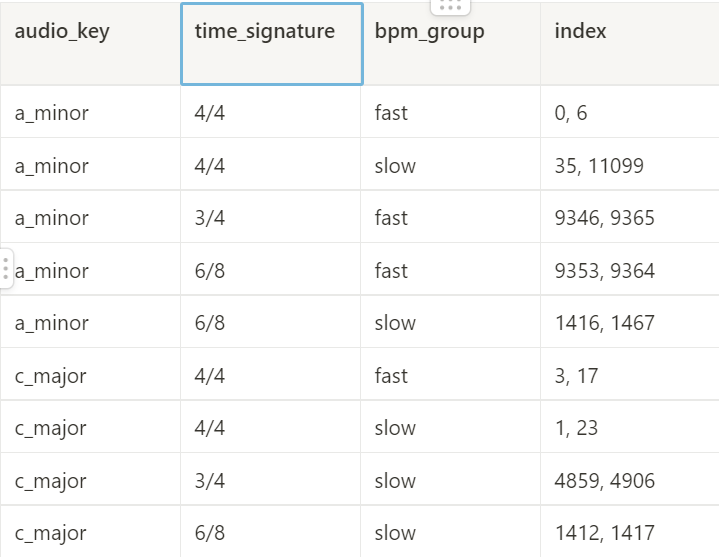

In [28]:
s11 = meta.loc[0, "chord_progressions"]
s12 = meta.loc[6, "chord_progressions"]
s13 = meta.loc[35, "chord_progressions"]
s14 = meta.loc[11099, "chord_progressions"]
s15 = meta.loc[9346, "chord_progressions"]
s16 = meta.loc[9365, "chord_progressions"]
s17 = meta.loc[9353, "chord_progressions"]
s18 = meta.loc[9364, "chord_progressions"]
s19 = meta.loc[1416, "chord_progressions"]
s20 = meta.loc[1467, "chord_progressions"]
s21 = meta.loc[3, "chord_progressions"]
s22 = meta.loc[17, "chord_progressions"]
s23 = meta.loc[1, "chord_progressions"]
s24 = meta.loc[23, "chord_progressions"]
s25 = meta.loc[4859, "chord_progressions"]
s26 = meta.loc[4906, "chord_progressions"]
s27 = meta.loc[1412, "chord_progressions"]
s28 = meta.loc[1417, "chord_progressions"]

In [29]:
s11n = get_index(s11)
s12n = get_index(s12)
s13n = get_index(s13)
s14n = get_index(s14)
s15n = get_index(s15)
s16n = get_index(s16)
s17n = get_index(s17)
s18n = get_index(s18)
s19n = get_index(s19)
s20n = get_index(s20)
s21n = get_index(s21)
s22n = get_index(s22)
s23n = get_index(s23)
s24n = get_index(s24)
s25n = get_index(s25)
s26n = get_index(s26)
s27n = get_index(s27)
s28n = get_index(s28)

In [30]:
import matplotlib.pyplot as plt

#상이한 샘플들 1대1로 비교하기

1.   두 chord progression을 나타내는 그래프를 그려주는 코딩
2.   alignment cost를 계산하고 두 chord progression 사이의 wardping 거리를 나타내는 선을 구현하는 코딩



(-3.1500000000000004, 66.15, 752.45, 6253.55)

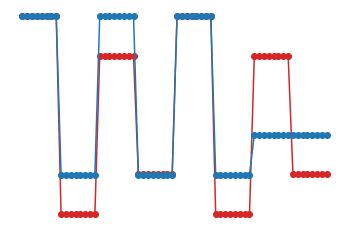

In [31]:
x = np.array(s11n)
y = np.array(s12n)

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off")

Alignment cost: 48016.0000
Normalized alignment cost: 375.1250


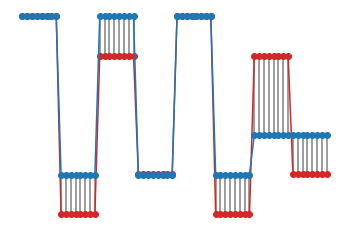

In [32]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

# Plot alignment
plt.figure(figsize=(6, 4))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off");

(-3.1500000000000004, 66.15, 1800.35, 6203.65)

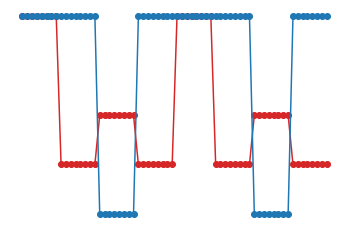

In [33]:
x = np.array(s13n)
y = np.array(s14n)

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off")

Alignment cost: 79992.0000
Normalized alignment cost: 624.9375


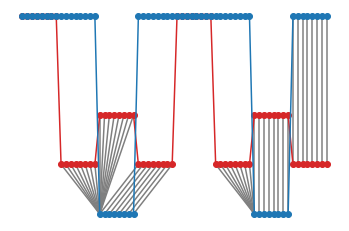

In [34]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

# Plot alignment
plt.figure(figsize=(6, 4))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off");

(-4.75, 99.75, 703.0, 7314.0)

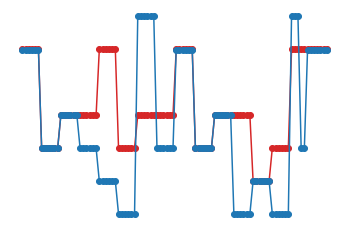

In [35]:
x = np.array(s15n)
y = np.array(s16n)

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off")

Alignment cost: 78066.0000
Normalized alignment cost: 406.5938


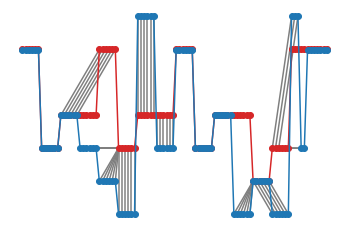

In [36]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

# Plot alignment
plt.figure(figsize=(6, 4))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off");

(-4.75, 99.75, 703.0, 7314.0)

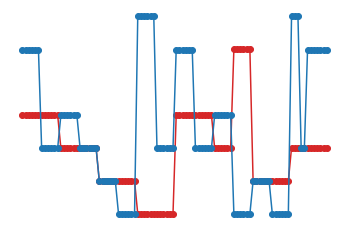

In [37]:
x = np.array(s17n)
y = np.array(s18n)

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off")

Alignment cost: 105101.0000
Normalized alignment cost: 547.4010


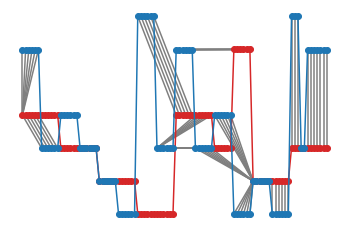

In [38]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

# Plot alignment
plt.figure(figsize=(6, 4))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off");

(-2.35, 49.35, 702.8499999999999, 7317.15)

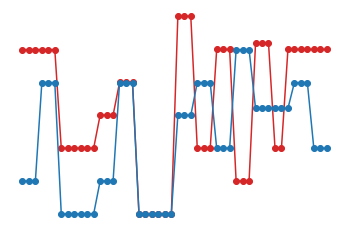

In [39]:
x = np.array(s19n)
y = np.array(s20n)

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off")

Alignment cost: 71421.0000
Normalized alignment cost: 743.9688


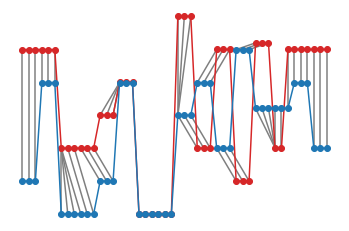

In [40]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

# Plot alignment
plt.figure(figsize=(6, 4))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off");

(-3.1500000000000004, 66.15, 739.3499999999999, 6462.65)

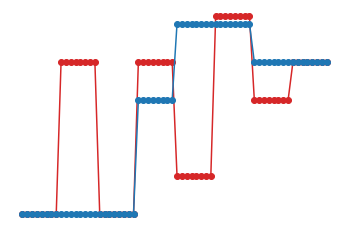

In [41]:
x = np.array(s21n)
y = np.array(s22n)

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off")

Alignment cost: 67192.0000
Normalized alignment cost: 524.9375


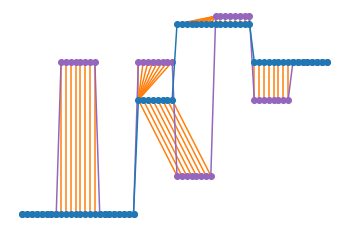

In [42]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

# Plot alignment
plt.figure(figsize=(6, 4))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C11")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C4")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C10")
plt.axis("off");

(-3.1500000000000004, 66.15, 749.3, 6253.7)

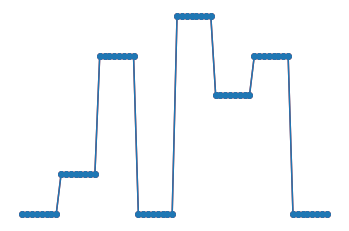

In [43]:
x = np.array(s23n)
y = np.array(s24n)

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off")

Alignment cost: 0.0000
Normalized alignment cost: 0.0000


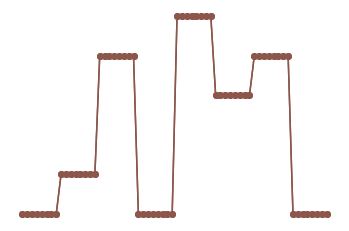

In [44]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

# Plot alignment
plt.figure(figsize=(6, 4))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C11")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C25")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C25")
plt.axis("off");

(-2.35, 49.35, 798.85, 5213.15)

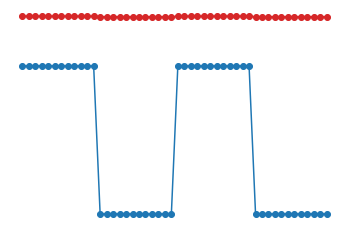

In [45]:
x = np.array(s25n)
y = np.array(s26n)

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off")

Alignment cost: 120144.0000
Normalized alignment cost: 1251.5000


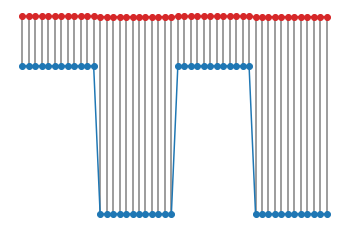

In [46]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

# Plot alignment
plt.figure(figsize=(6, 4))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off");

(-2.35, 49.35, 699.3499999999999, 7302.65)

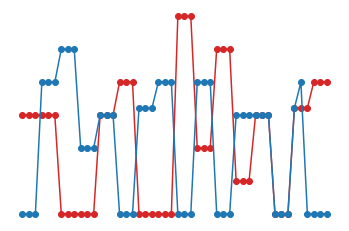

In [47]:
x = np.array(s27n)
y = np.array(s28n)

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off")

Alignment cost: 55753.0000
Normalized alignment cost: 580.7604


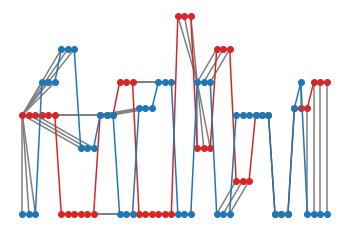

In [48]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

# Plot alignment
plt.figure(figsize=(6, 4))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off");

# DTW에 사용하게 될 샘플 50개 무작위로 뽑아내기


*   모든 data를 사요하면 시간이 너무 많이 소요... 사용하는 데이터의 수를 점차적으로 늘리는 수밖에 없음




In [48]:
#meta.sample(n=50)

In [49]:
s1 = meta.loc[4150, "chord_progressions"]
s2 = meta.loc[4994, "chord_progressions"]
s3 = meta.loc[3685, "chord_progressions"]
s4 = meta.loc[11108, "chord_progressions"]
s5 = meta.loc[8863, "chord_progressions"]
s6 = meta.loc[10016, "chord_progressions"]
s7 = meta.loc[7343, "chord_progressions"]
s8 = meta.loc[7904, "chord_progressions"]
s9 = meta.loc[7267, "chord_progressions"]
s10 = meta.loc[10972, "chord_progressions"]
s11 = meta.loc[8412, "chord_progressions"]
s12 = meta.loc[7596, "chord_progressions"]
s13 = meta.loc[511, "chord_progressions"]
s14 = meta.loc[9727, "chord_progressions"]
s15 = meta.loc[7636, "chord_progressions"]
s16 = meta.loc[6201, "chord_progressions"]
s17 = meta.loc[5031, "chord_progressions"]
s18 = meta.loc[6559, "chord_progressions"]
s19 = meta.loc[2820, "chord_progressions"]
s20 = meta.loc[3192, "chord_progressions"]
s21 = meta.loc[5598, "chord_progressions"]
s22 = meta.loc[10054, "chord_progressions"]
s23 = meta.loc[1067, "chord_progressions"]
s24 = meta.loc[10472, "chord_progressions"]
s25 = meta.loc[9822, "chord_progressions"]
s26 = meta.loc[4294, "chord_progressions"]
s27 = meta.loc[8669, "chord_progressions"]
s28 = meta.loc[971, "chord_progressions"]
s29 = meta.loc[2396, "chord_progressions"]
s30 = meta.loc[1579, "chord_progressions"]
s31 = meta.loc[8572, "chord_progressions"]
s32 = meta.loc[8754, "chord_progressions"]
s33 = meta.loc[5642, "chord_progressions"]
s34 = meta.loc[7691, "chord_progressions"]
s35 = meta.loc[7249, "chord_progressions"]
s36 = meta.loc[4552, "chord_progressions"]
s37 = meta.loc[7498, "chord_progressions"]
s38 = meta.loc[4489, "chord_progressions"]
s39 = meta.loc[3105, "chord_progressions"]
s40 = meta.loc[2995, "chord_progressions"]
s41 = meta.loc[614, "chord_progressions"]
s42 = meta.loc[10937, "chord_progressions"]
s43 = meta.loc[765, "chord_progressions"]
s44 = meta.loc[9193, "chord_progressions"]
s45 = meta.loc[10701, "chord_progressions"]
s46 = meta.loc[8962, "chord_progressions"]
s47 = meta.loc[8791, "chord_progressions"]
s48 = meta.loc[1074, "chord_progressions"]
s49 = meta.loc[1117, "chord_progressions"]
s50 = meta.loc[2567, "chord_progressions"]

In [50]:
print("s1:", s1)
print("s2:", s2)
print("s3:", s3)
print("s4:", s4)
print("s5:", s5)
print("s6:", s6)
print("s7:", s7)
print("s8:", s8)
print("s9:", s9)
print("s10:", s10)
print("s11:", s11)
print("s12:", s12)
print("s13:", s13)
print("s14:", s14)
print("s15:", s15)
print("s16:", s16)
print("s17:", s17)
print("s18:", s18)
print("s19:", s19)
print("s20:", s20)
print("s21:", s21)
print("s22:", s22)
print("s23:", s23)
print("s24:", s24)
print("s25:", s25)
print("s26:", s26)
print("s27:", s27)
print("s28:", s28)
print("s29:", s29)
print("s30:", s30)
print("s31:", s31)
print("s32:", s32)
print("s33:", s33)
print("s34:", s34)
print("s35:", s35)
print("s36:", s36)
print("s37:", s37)
print("s38:", s38)
print("s39:", s39)
print("s40:", s40)
print("s41:", s41)
print("s42:", s42)
print("s43:", s43)
print("s44:", s44)
print("s45:", s45)
print("s46:", s46)
print("s47:", s47)
print("s48:", s48)
print("s49:", s49)
print("s50:", s50)

s1: ['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A#m', 'A#m', 'A#m', 'A#m', 'A#m', 'A#m', 'A#m', 'A#m', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C#maj7', 'C#maj7', 'C#maj7', 'C#maj7', 'C#maj7', 'C#maj7', 'C#maj7', 'C#maj7', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A#m', 'A#m', 'A#m', 'A#m', 'A#m', 'A#m', 'A#m', 'A#m', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C#maj7', 'C#maj7', 'C#maj7', 'C#maj7', 'C#maj7', 'C#maj7', 'C#maj7', 'C#maj7']
s2: ['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Fmaj7', 'Fmaj7', 'Fmaj7', 'Fmaj7', 'Fmaj7', 'Fmaj7', 'Fmaj7', 'Fmaj7', 'Dm7', 'Dm7', 'Dm7', 'Dm7', 'Dm7', 'Dm7', 'Dm7', 'Dm7', 'Em', 'Em', 'Em', 'Em', 'Em', 'Em', 'Em', 'Em', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Fmaj7', 'Fmaj7', 'Fmaj7', 'Fmaj7', 'Fmaj7', 'Fmaj7', 'Fmaj7', 'Fmaj7', 'Dm7', 'Dm7', 'Dm7', 'Dm7', 'Dm7', 'Dm7', 'Dm7', 'Dm7', 'E7', 'E7', 'E7', 'E7', 'E7', 'E7', 'E7', 'E7']
s3: ['Cmaj7', 'Cmaj7', 'Cmaj7', 'Cmaj7', 'G', 'G', 'G', 'G', 'Am7', 'Am7', 'Am7', 'Am7', 'Gm7'

In [51]:
s1n = get_index(s1)
s2n = get_index(s2)
s3n = get_index(s3)
s4n = get_index(s4)
s5n = get_index(s5)
s6n = get_index(s6)
s7n = get_index(s7)
s8n = get_index(s8)
s9n = get_index(s9)
s10n = get_index(s10)
s11n = get_index(s11)
s12n = get_index(s12)
s13n = get_index(s13)
s14n = get_index(s14)
s15n = get_index(s15)
s16n = get_index(s16)
s17n = get_index(s17)
s18n = get_index(s18)
s19n = get_index(s19)
s20n = get_index(s20)
s21n = get_index(s21)
s22n = get_index(s22)
s23n = get_index(s23)
s24n = get_index(s24)
s25n = get_index(s25)
s26n = get_index(s26)
s27n = get_index(s27)
s28n = get_index(s28)
s29n = get_index(s29)
s30n = get_index(s30)
s31n = get_index(s31)
s32n = get_index(s32)
s33n = get_index(s33)
s34n = get_index(s34)
s35n = get_index(s35)
s36n = get_index(s36)
s37n = get_index(s37)
s38n = get_index(s38)
s39n = get_index(s39)
s40n = get_index(s40)
s41n = get_index(s41)
s42n = get_index(s42)
s43n = get_index(s43)
s44n = get_index(s44)
s45n = get_index(s45)
s46n = get_index(s46)
s47n = get_index(s47)
s48n = get_index(s48)
s49n = get_index(s49)
s50n = get_index(s50)

In [52]:
print("s1:", s1n)
print("s2:", s2n)
print("s3:", s3n)
print("s4:", s4n)
print("s5:", s5n)
print("s6:", s6n)
print("s7:", s7n)
print("s8:", s8n)
print("s9:", s9n)
print("s10:", s10n)
print("s11:", s11n)
print("s12:", s12n)
print("s13:", s13n)
print("s14:", s14n)
print("s15:", s15n)
print("s16:", s16n)
print("s17:", s17n)
print("s18:", s18n)
print("s19:", s19n)
print("s20:", s20n)
print("s21:", s21n)
print("s22:", s22n)
print("s23:", s23n)
print("s24:", s24n)
print("s25:", s25n)
print("s26:", s26n)
print("s27:", s27n)
print("s28:", s28n)
print("s29:", s29n)
print("s30:", s30n)
print("s31:", s31n)
print("s32:", s32n)
print("s33:", s33n)
print("s34:", s34n)
print("s35:", s35n)
print("s36:", s36n)
print("s37:", s37n)
print("s38:", s38n)
print("s39:", s39n)
print("s40:", s40n)
print("s41:", s41n)
print("s42:", s42n)
print("s43:", s43n)
print("s44:", s44n)
print("s45:", s45n)
print("s46:", s46n)
print("s47:", s47n)
print("s48:", s48n)
print("s49:", s49n)
print("s50:", s50n)

s1: [6002, 6002, 6002, 6002, 6002, 6002, 6002, 6002, 6202, 6202, 6202, 6202, 6202, 6202, 6202, 6202, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1205, 1205, 1205, 1205, 1205, 1205, 1205, 1205, 6002, 6002, 6002, 6002, 6002, 6002, 6002, 6002, 6202, 6202, 6202, 6202, 6202, 6202, 6202, 6202, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1205, 1205, 1205, 1205, 1205, 1205, 1205, 1205]
s2: [6002, 6002, 6002, 6002, 6002, 6002, 6002, 6002, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 3002, 3002, 3002, 3002, 3002, 3002, 3002, 3002, 6002, 6002, 6002, 6002, 6002, 6002, 6002, 6002, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 3003, 3003, 3003, 3003, 3003, 3003, 3003, 3003]
s3: [1005, 1005, 1005, 1005, 5001, 5001, 5001, 5001, 6004, 6004, 6004, 6004, 5004, 5004, 5004, 5004, 4005, 4005, 4005, 4005, 3004, 3004, 3004, 3004, 4215, 4215, 4215, 4215, 5011, 5011, 5003, 5003, 4005, 4005, 4005, 4005, 1

# Indexing 과정을 거친후 데이터 프레임으로 만들어주기


*   데이터프레임을 만드는 이유는 추후에 clustering을 진행하기 위해서다




In [53]:
df1 = pd.DataFrame(s1n)
df1.rename(columns={0: "s1"}, inplace=True)
df2 = pd.DataFrame(s2n)
df2.rename(columns={0: "s2"}, inplace=True)
df3 = pd.DataFrame(s3n)
df3.rename(columns={0: "s3"}, inplace=True)
df4 = pd.DataFrame(s4n)
df4.rename(columns={0: "s4"}, inplace=True)
df5 = pd.DataFrame(s5n)
df5.rename(columns={0: "s5"}, inplace=True)
df6 = pd.DataFrame(s6n)
df6.rename(columns={0: "s6"}, inplace=True)
df7 = pd.DataFrame(s7n)
df7.rename(columns={0: "s7"}, inplace=True)
df8 = pd.DataFrame(s8n)
df8.rename(columns={0: "s8"}, inplace=True)
df9 = pd.DataFrame(s9n)
df9.rename(columns={0: "s9"}, inplace=True)
df10 = pd.DataFrame(s10n)
df10.rename(columns={0: "s10"}, inplace=True)
df11 = pd.DataFrame(s11n)
df11.rename(columns={0: "s11"}, inplace=True)
df12 = pd.DataFrame(s12n)
df12.rename(columns={0: "s12"}, inplace=True)
df13 = pd.DataFrame(s13n)
df13.rename(columns={0: "s13"}, inplace=True)
df14 = pd.DataFrame(s14n)
df14.rename(columns={0: "s14"}, inplace=True)
df15 = pd.DataFrame(s15n)
df15.rename(columns={0: "s15"}, inplace=True)
df16 = pd.DataFrame(s16n)
df16.rename(columns={0: "s16"}, inplace=True)
df17 = pd.DataFrame(s17n)
df17.rename(columns={0: "s17"}, inplace=True)
df18 = pd.DataFrame(s18n)
df18.rename(columns={0: "s18"}, inplace=True)
df19 = pd.DataFrame(s19n)
df19.rename(columns={0: "s19"}, inplace=True)
df20 = pd.DataFrame(s20n)
df20.rename(columns={0: "s20"}, inplace=True)
df21 = pd.DataFrame(s21n)
df21.rename(columns={0: "s21"}, inplace=True)
df22 = pd.DataFrame(s22n)
df22.rename(columns={0: "s22"}, inplace=True)
df23 = pd.DataFrame(s23n)
df23.rename(columns={0: "s23"}, inplace=True)
df24 = pd.DataFrame(s24n)
df24.rename(columns={0: "s24"}, inplace=True)
df25 = pd.DataFrame(s25n)
df25.rename(columns={0: "s25"}, inplace=True)
df26 = pd.DataFrame(s26n)
df26.rename(columns={0: "s26"}, inplace=True)
df27 = pd.DataFrame(s27n)
df27.rename(columns={0: "s27"}, inplace=True)
df28 = pd.DataFrame(s28n)
df28.rename(columns={0: "s28"}, inplace=True)
df29 = pd.DataFrame(s29n)
df29.rename(columns={0: "s29"}, inplace=True)
df30 = pd.DataFrame(s30n)
df30.rename(columns={0: "s30"}, inplace=True)
df31 = pd.DataFrame(s31n)
df31.rename(columns={0: "s31"}, inplace=True)
df32 = pd.DataFrame(s32n)
df32.rename(columns={0: "s32"}, inplace=True)
df33 = pd.DataFrame(s33n)
df33.rename(columns={0: "s33"}, inplace=True)
df34 = pd.DataFrame(s34n)
df34.rename(columns={0: "s34"}, inplace=True)
df35 = pd.DataFrame(s35n)
df35.rename(columns={0: "s35"}, inplace=True)
df36 = pd.DataFrame(s36n)
df36.rename(columns={0: "s36"}, inplace=True)
df37 = pd.DataFrame(s37n)
df37.rename(columns={0: "s37"}, inplace=True)
df38 = pd.DataFrame(s38n)
df38.rename(columns={0: "s38"}, inplace=True)
df39 = pd.DataFrame(s39n)
df39.rename(columns={0: "s39"}, inplace=True)
df40 = pd.DataFrame(s40n)
df40.rename(columns={0: "s40"}, inplace=True)
df41 = pd.DataFrame(s41n)
df41.rename(columns={0: "s41"}, inplace=True)
df42 = pd.DataFrame(s42n)
df42.rename(columns={0: "s42"}, inplace=True)
df43 = pd.DataFrame(s43n)
df43.rename(columns={0: "s43"}, inplace=True)
df44 = pd.DataFrame(s44n)
df44.rename(columns={0: "s44"}, inplace=True)
df45 = pd.DataFrame(s45n)
df45.rename(columns={0: "s45"}, inplace=True)
df46 = pd.DataFrame(s46n)
df46.rename(columns={0: "s46"}, inplace=True)
df47 = pd.DataFrame(s47n)
df47.rename(columns={0: "s47"}, inplace=True)
df48 = pd.DataFrame(s48n)
df48.rename(columns={0: "s48"}, inplace=True)
df49 = pd.DataFrame(s49n)
df49.rename(columns={0: "s49"}, inplace=True)
df50 = pd.DataFrame(s50n)
df50.rename(columns={0: "s50"}, inplace=True)

In [54]:
dff = pd.concat([df1,df2],axis=1)
dff1 = pd.concat([dff,df3],axis=1)
dff2 = pd.concat([dff1,df4],axis=1)
dff3 = pd.concat([dff2,df5],axis=1)
dff4 = pd.concat([dff3,df6],axis=1)
dff5 = pd.concat([dff4,df7],axis=1)
dff6 = pd.concat([dff5,df8],axis=1)
dff7 = pd.concat([dff6,df9],axis=1)
dff8 = pd.concat([dff7,df10],axis=1)
dff9 = pd.concat([dff8,df11],axis=1)
dff10 = pd.concat([dff9,df12],axis=1)
dff11 = pd.concat([dff10,df13],axis=1)
dff12 = pd.concat([dff11,df14],axis=1)
dff13 = pd.concat([dff12,df15],axis=1)
dff14 = pd.concat([dff13,df16],axis=1)
dff15 = pd.concat([dff14,df17],axis=1)
dff16 = pd.concat([dff15,df18],axis=1)
dff17 = pd.concat([dff16,df19],axis=1)
dff18 = pd.concat([dff17,df20],axis=1)
dff19 = pd.concat([dff18,df21],axis=1)
dff20 = pd.concat([dff19,df22],axis=1)
dff21 = pd.concat([dff20,df23],axis=1)
dff22 = pd.concat([dff21,df24],axis=1)
dff23 = pd.concat([dff22,df25],axis=1)
dff24 = pd.concat([dff23,df26],axis=1)
dff25 = pd.concat([dff24,df27],axis=1)
dff26 = pd.concat([dff25,df28],axis=1)
dff27 = pd.concat([dff26,df29],axis=1)
dff28 = pd.concat([dff27,df30],axis=1)
dff29 = pd.concat([dff28,df31],axis=1)
dff30 = pd.concat([dff29,df32],axis=1)
dff31 = pd.concat([dff30,df33],axis=1)
dff32 = pd.concat([dff31,df34],axis=1)
dff33 = pd.concat([dff32,df35],axis=1)
dff34 = pd.concat([dff33,df36],axis=1)
dff35 = pd.concat([dff34,df37],axis=1)
dff36 = pd.concat([dff35,df38],axis=1)
dff37 = pd.concat([dff36,df39],axis=1)
dff38 = pd.concat([dff37,df40],axis=1)
dff39 = pd.concat([dff38,df41],axis=1)
dff40 = pd.concat([dff39,df42],axis=1)
dff41 = pd.concat([dff40,df43],axis=1)
dff42 = pd.concat([dff41,df44],axis=1)
dff43 = pd.concat([dff42,df45],axis=1)
dff44 = pd.concat([dff43,df46],axis=1)
dff45 = pd.concat([dff44,df47],axis=1)
dff46 = pd.concat([dff45,df48],axis=1)
dff47 = pd.concat([dff46,df49],axis=1)
dff48 = pd.concat([dff47,df50],axis=1)

dff48


,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s41,s42,s43,s44,s45,s46,s47,s48,s49,s50
0,6002.0,6002.0,1005.0,1005.0,4005.0,6002.0,2004.0,1001.0,1001.0,1005.0,...,1001.0,1005.0,1001.0,6004.0,4005.0,6002.0,1001.0,1001.0,6002.0,1001.0
1,6002.0,6002.0,1005.0,1005.0,4005.0,6002.0,2004.0,1001.0,1001.0,1005.0,...,1001.0,1005.0,1001.0,6004.0,4005.0,6002.0,1001.0,1001.0,6002.0,1001.0
2,6002.0,6002.0,1005.0,1005.0,4005.0,6002.0,2004.0,1001.0,1001.0,1005.0,...,1001.0,1005.0,1001.0,6004.0,4005.0,6002.0,1001.0,1001.0,6002.0,1001.0
3,6002.0,6002.0,1005.0,1005.0,4005.0,6002.0,2004.0,1001.0,1001.0,1005.0,...,1001.0,1005.0,1001.0,6004.0,4005.0,6002.0,1001.0,1001.0,6002.0,1001.0
4,6002.0,6002.0,5001.0,1005.0,3002.0,6002.0,5011.0,1001.0,1001.0,1005.0,...,1001.0,1005.0,1001.0,4005.0,4005.0,6002.0,1001.0,1001.0,6002.0,1001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
a = list(range(1,97))

In [56]:
dff49 = pd.DataFrame({'chord_location':a})

In [57]:
dff50 = pd.concat([dff49,dff48],axis=1)
dff50

,chord_location,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s41,s42,s43,s44,s45,s46,s47,s48,s49,s50
0,1.0,6002.0,6002.0,1005.0,1005.0,4005.0,6002.0,2004.0,1001.0,1001.0,...,1001.0,1005.0,1001.0,6004.0,4005.0,6002.0,1001.0,1001.0,6002.0,1001.0
1,2.0,6002.0,6002.0,1005.0,1005.0,4005.0,6002.0,2004.0,1001.0,1001.0,...,1001.0,1005.0,1001.0,6004.0,4005.0,6002.0,1001.0,1001.0,6002.0,1001.0
2,3.0,6002.0,6002.0,1005.0,1005.0,4005.0,6002.0,2004.0,1001.0,1001.0,...,1001.0,1005.0,1001.0,6004.0,4005.0,6002.0,1001.0,1001.0,6002.0,1001.0
3,4.0,6002.0,6002.0,1005.0,1005.0,4005.0,6002.0,2004.0,1001.0,1001.0,...,1001.0,1005.0,1001.0,6004.0,4005.0,6002.0,1001.0,1001.0,6002.0,1001.0
4,5.0,6002.0,6002.0,5001.0,1005.0,3002.0,6002.0,5011.0,1001.0,1001.0,...,1001.0,1005.0,1001.0,4005.0,4005.0,6002.0,1001.0,1001.0,6002.0,1001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
dff51 = dff50.transpose()
dff51

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
chord_location,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s1,6002.0,6002.0,6002.0,6002.0,6002.0,6002.0,6002.0,6002.0,6202.0,6202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s2,6002.0,6002.0,6002.0,6002.0,6002.0,6002.0,6002.0,6002.0,4005.0,4005.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s3,1005.0,1005.0,1005.0,1005.0,5001.0,5001.0,5001.0,5001.0,6004.0,6004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s4,1005.0,1005.0,1005.0,1005.0,1005.0,1005.0,1005.0,1005.0,4005.0,4005.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s5,4005.0,4005.0,4005.0,4005.0,3002.0,3002.0,3002.0,3002.0,6002.0,6002.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s6,6002.0,6002.0,6002.0,6002.0,6002.0,6002.0,6002.0,6002.0,6002.0,6002.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s7,2004.0,2004.0,2004.0,2004.0,5011.0,5011.0,5011.0,5011.0,1005.0,1005.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s8,1001.0,1001.0,1001.0,1001.0,1001.0,1001.0,1001.0,1001.0,4001.0,4001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s9,1001.0,1001.0,1001.0,1001.0,1001.0,1001.0,1001.0,1001.0,4002.0,4002.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
dff51n = dff51.fillna(0)

In [60]:
dff51nd = dff51n.drop(['chord_location'], axis=0)
dff51nd

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
s1,6002.0,6002.0,6002.0,6002.0,6002.0,6002.0,6002.0,6002.0,6202.0,6202.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s2,6002.0,6002.0,6002.0,6002.0,6002.0,6002.0,6002.0,6002.0,4005.0,4005.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s3,1005.0,1005.0,1005.0,1005.0,5001.0,5001.0,5001.0,5001.0,6004.0,6004.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s4,1005.0,1005.0,1005.0,1005.0,1005.0,1005.0,1005.0,1005.0,4005.0,4005.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s5,4005.0,4005.0,4005.0,4005.0,3002.0,3002.0,3002.0,3002.0,6002.0,6002.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s6,6002.0,6002.0,6002.0,6002.0,6002.0,6002.0,6002.0,6002.0,6002.0,6002.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s7,2004.0,2004.0,2004.0,2004.0,5011.0,5011.0,5011.0,5011.0,1005.0,1005.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s8,1001.0,1001.0,1001.0,1001.0,1001.0,1001.0,1001.0,1001.0,4001.0,4001.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s9,1001.0,1001.0,1001.0,1001.0,1001.0,1001.0,1001.0,1001.0,4002.0,4002.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s10,1005.0,1005.0,1005.0,1005.0,1005.0,1005.0,1005.0,1005.0,1005.0,1005.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Clustering 진행하기


*   누가봐도 확연이 다른 두개의 코드진행을 비교하는 것을 무의미
*   비슷한 코드진행끼리 묶은 후 그 안에서 DTW를 하는 것이 효과적일 것이라고 판단



In [61]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 5.4 MB/s 


In [62]:

from tslearn.clustering import TimeSeriesKMeans

from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

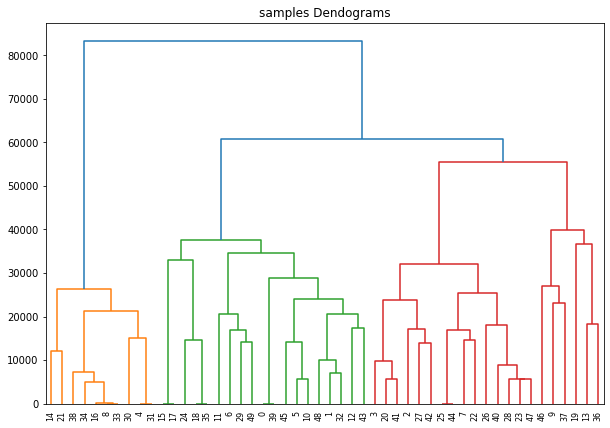

In [63]:
data = dff51nd.iloc[:, 0:127].values

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("samples Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [64]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(dff51nd)

array([2, 2, 0, 0, 1, 2, 2, 0, 1, 0, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 0, 1,
       0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 2, 0, 0, 1, 2, 0, 0, 0, 2,
       0, 2, 0, 0, 2, 2])

In [65]:
a = np.array(s15n)
b = np.array(s22n)
c = np.array(s39n)
d = np.array(s35n)
e = np.array(s17n)
f = np.array(s9n)
g = np.array(s34n)
h = np.array(s31n)
i = np.array(s5n)
j = np.array(s32n)


for cur_b in [b, c, d, e, f, g, h, i, j]:

    # Distance matrix
    N = a.shape[0]
    M = cur_b.shape[0]
    dist_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            dist_mat[i, j] = abs(a[i] - cur_b[j])

    # DTW
    path, cost_mat = dp(dist_mat)
    print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))

    print()

Alignment cost: 67990.0000

Alignment cost: 72774.0000

Alignment cost: 76790.0000

Alignment cost: 60750.0000

Alignment cost: 60802.0000

Alignment cost: 60802.0000

Alignment cost: 83982.0000

Alignment cost: 80006.0000

Alignment cost: 80006.0000



# 유사하다는 기준점을 세우기 위해 sigmoid 함수 사용하기

1.   Alignment cost를 StandardScaler를 사용해 변환
2.   Sigmoid 함수 적용
3.   Sigmoid 함수를 통해서 나온 최종값들의 평균보다 작다면 두 chord progression은 유사하다고 볼 수 있다.



In [66]:
X = np.array([[67990],[72774],[76790],[60750],[60802],[83982],[80006],[80006]])
X

array([[67990],
       [72774],
       [76790],
       [60750],
       [60802],
       [83982],
       [80006],
       [80006]])

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()

In [69]:
X = scaler.fit_transform(X)
X

array([[-0.58691634],
       [-0.01360184],
       [ 0.46767555],
       [-1.45455784],
       [-1.44832616],
       [ 1.32956474],
       [ 0.85308095],
       [ 0.85308095]])

In [70]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = X
y = sigmoid(x)
print(y)

[[0.3573427 ]
 [0.49659959]
 [0.61483344]
 [0.1893011 ]
 [0.1902593 ]
 [0.79076863]
 [0.70121304]
 [0.70121304]]


# 검증

*   실제로 sigmoid 함수가 평균 보다 작은 두 코드 진행의 대략적인 트렌드가 sigmoid 함수가 평균보다 큰 두 코드 진행의 트렌드보다 비슷하다는 것을 볼 수 있다.



(-2.35, 49.35, 743.55, 6462.45)

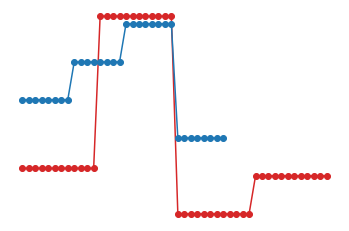

In [71]:
x = np.array(s15n)
y = np.array(s22n)

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off")

(-2.35, 49.35, 739.3499999999999, 6462.65)

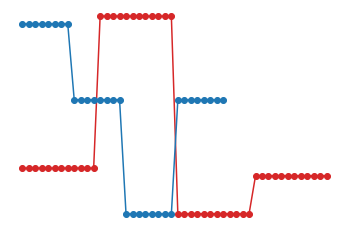

In [72]:
x = np.array(s15n)
y = np.array(s31n)

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off")